In [ ]:
# the goal in this notebook is to visualize the keras model

# import libraries necessary for building the CNN
import numpy as np
import keras
from keras.layers import Input, Conv2D, Dense, Activation, Flatten
from keras.models import Sequential
from keras.datasets import mnist

In [ ]:
# for plotting the model
# !pip install pydot
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [ ]:
# important variables
num_classes = 10 # one for each of the digits from 0-9
batch_size = 128 #tunable number
epochs = 13 #tunable number

In [ ]:
# import mnist data from keras
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape the x data do it's 4 dimensional --> I think the last dimension represents color channels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# we need to normalize the X data before feeding into our model
X_train = X_train/255
X_test = X_test/255

# we also need to convert the Y data into one-hot vectors
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


In [ ]:
# building the architecture of the convolutional model
model = Sequential() #this will allow us to build a linear stack of layers --> hmmm is this restrictive in any way?
                    # we may not want to limit folks to only a linear stack of layers, because this could
                    # prevent them from making cool skip connections and stuff like that . . . something to consider
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (28,28, 1)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

In [ ]:
# train the model on the training data
model.fit(X_train, Y_train, batch_size = batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

In [6]:
model = keras.models.load_model("./CNN01")

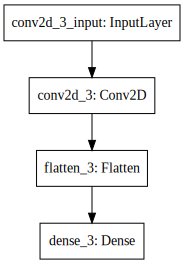

In [7]:
#import pydot
#plot_model(model, to_file='model01.png')
SVG(model_to_dot(model).create(prog='dot', format="svg"))